In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread(r'C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\test_images\kohli1.jpg')
img.shape

(605, 806, 3)

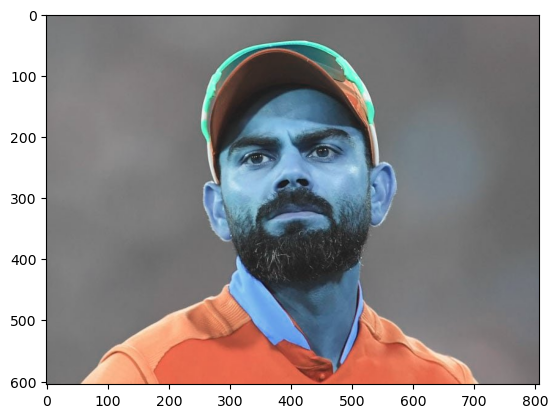

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(605, 806)

In [5]:
gray

array([[122, 122, 122, ..., 114, 114, 114],
       [122, 122, 122, ..., 114, 114, 114],
       [123, 123, 123, ..., 114, 114, 114],
       ...,
       [116, 117, 117, ..., 113, 112, 113],
       [116, 116, 117, ..., 113, 112, 113],
       [115, 116, 117, ..., 113, 112, 113]], dtype=uint8)

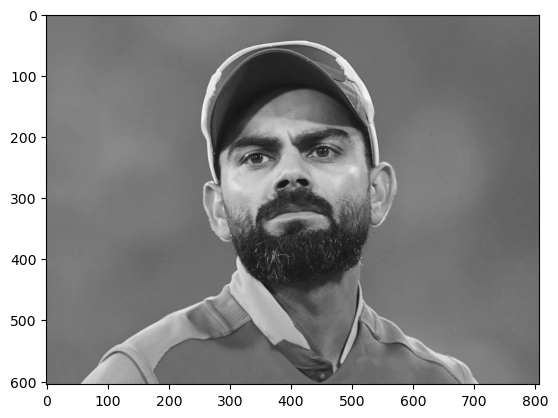

In [6]:
plt.imshow(gray, cmap='gray')

In [7]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[270, 127, 252, 252]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(270, 127, 252, 252)

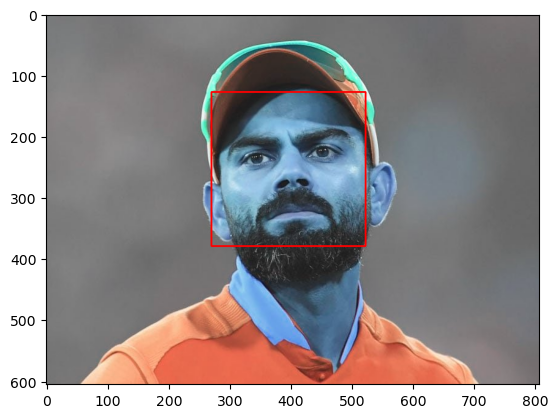

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

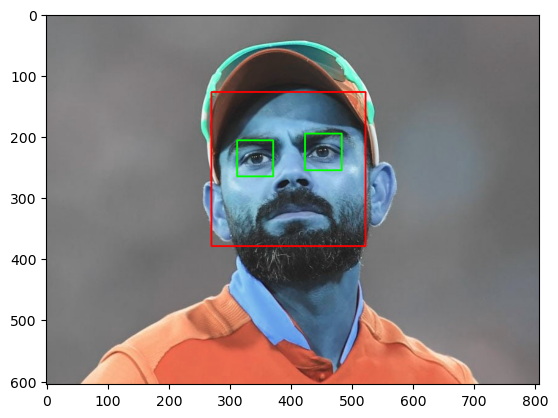

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

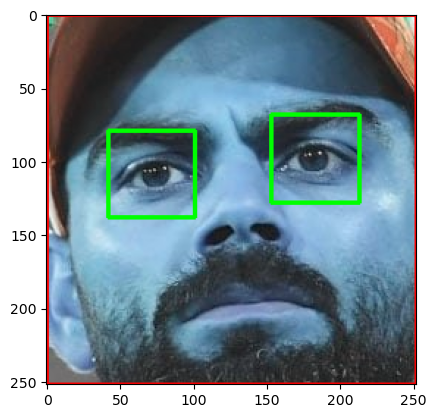

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

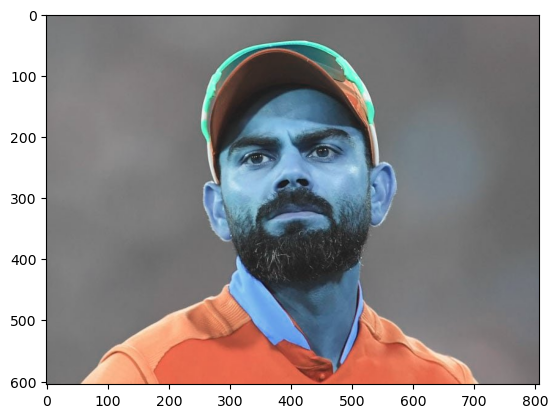

In [13]:
original_image = cv2.imread(r'C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\test_images\kohli1.jpg')
plt.imshow(original_image)

In [14]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes(r'C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\test_images\kohli2.jpg')
cropped_image_no_2_eyes

In [15]:
path_to_data = r"C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset"
path_to_cr_data = r"C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset\cropped\\"

In [16]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [17]:
img_dirs

['C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\Akshay',
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\kohli',
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\messi',
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\Nora',
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\Urvashi']

In [18]:
import os
import cv2
import shutil

# Clean and recreate cropped dataset directory
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [19]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # ✅ safe way to extract folder name
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)  # ✅ safe join
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder:", cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)  # ✅ safe path
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Akshay
Generating cropped images in folder: C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset\cropped\\Akshay
kohli
Generating cropped images in folder: C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset\cropped\\kohli
messi
Generating cropped images in folder: C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset\cropped\\messi
Nora
Generating cropped images in folder: C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset\cropped\\Nora
Urvashi
Generating cropped images in folder: C:\Users\Lenovo\Documents\code\CelebrityFaceRecognition\model\dataset\cropped\\Urvashi


In [26]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay': ['C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay1.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay10.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay11.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay12.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay13.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay14.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay\\Akshay15.png',
  'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Aksha

In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay': 0,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\kohli': 1,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\messi': 2,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Nora': 3,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Urvashi': 4}

In [28]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [29]:
len(X[0])

4096

In [30]:
32*32*3 + 32*32

4096

In [31]:
X[0]

array([[15],
       [21],
       [35],
       ...,
       [12],
       [13],
       [12]], dtype=uint8)

In [32]:
y[0]

0

In [33]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(313, 4096)

In [34]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.759493670886076

In [36]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.44      0.50        16
           1       1.00      0.75      0.86        12
           2       1.00      0.67      0.80        12
           3       0.90      0.90      0.90        10
           4       0.68      0.93      0.78        29

    accuracy                           0.76        79
   macro avg       0.83      0.74      0.77        79
weighted avg       0.78      0.76      0.75        79



In [37]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [38]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [39]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.828770,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.709436,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.769103,{'logisticregression__C': 1}


In [40]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [44]:
best_estimators['svm'].score(X_test,y_test)

0.810126582278481

In [45]:
best_estimators['random_forest'].score(X_test,y_test)

0.6455696202531646

In [46]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7215189873417721

In [47]:
best_clf = best_estimators['svm']

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  1,  1,  0,  4],
       [ 1,  8,  0,  0,  3],
       [ 2,  0,  9,  0,  1],
       [ 0,  0,  0, 10,  0],
       [ 1,  0,  0,  1, 27]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

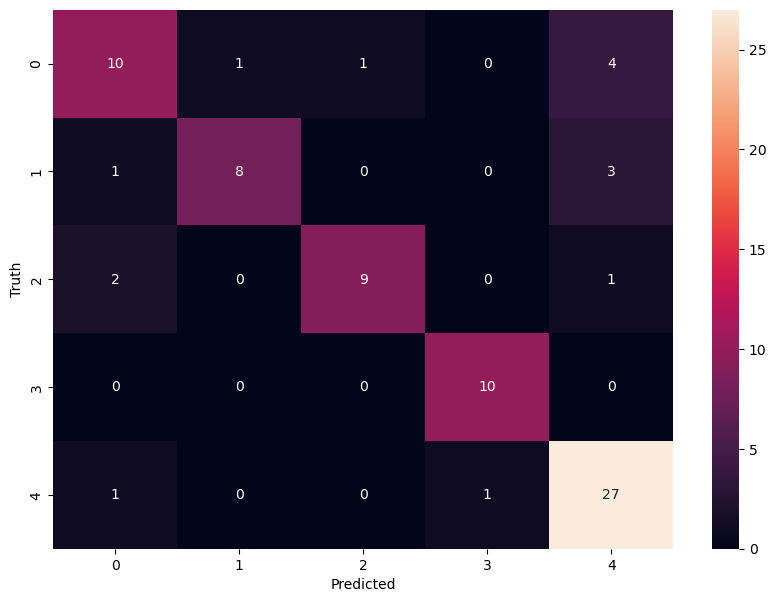

In [49]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
class_dict

{'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Akshay': 0,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\kohli': 1,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\messi': 2,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Nora': 3,
 'C:\\Users\\Lenovo\\Documents\\code\\CelebrityFaceRecognition\\model\\dataset\\cropped\\\\Urvashi': 4}

In [51]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

Defaulting to user installation because normal site-packages is not writeable


['saved_model.pkl']

In [52]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))